# zadanie 1
![alt text](image.png)

Policzenie liter w słowie
```
Count me amount of 'i' in the word 'iiiiiiiiiiiiiiiiiiiiiiiiiiiii'. (29 i) -> odp 27 (27 jest znacznie bardziej popularne od 29)
Count me amount of 'i' in the word 'iiiiiiiiiiiiiiiiiiiiiiiiiiiiii'. (30 i) -> odp 30

Reverse me word wefjnelfcsalkmsalkmsdalkm -> mkladslkmaskmlsaceflnejfw
    correct ->                               mkladsmklasmklascflenjfew

Jeszcze może być generowanie pattern'ów, bardziej skomplikowanych.

```

# zadanie 2
![alt text](image-1.png)

### Złych było:
![alt text](image-2.png)
![alt text](image-3.png)
XD
![alt text](image-6.png)
pół na pół, bo faktycznie z Zeusem
![alt text](image-8.png)
![alt text](image-9.png)
XD, Horacy, a Oda to Mickiewicz
![alt text](image-12.png)

### Dobrych było:
![alt text](image-4.png)
![alt text](image-5.png)
![alt text](image-7.png)
![alt text](image-10.png)
![alt text](image-11.png)

# zadanie 3
![alt text](image-13.png)


https://www.unscramblerer.com/scrabble-twl-dictionary-statistics/

C, S, K są dość popularne w języku angielskim:

C: 9.23% słów zaczyna się na C
S: 11.12%
K: 1.08%

Perplexity - jak nie znany jest tekst dla LLM

Low probability, high perplexity i vice versa

Burstiness - jak bardzo zdania są złożone, np jak człowiek używa trudnych słów to pojawiają się przez chwilę często i potem prawie wcale

Dodawanie znaku wodnego można by było rozwiązać w następujący sposób:

- przewidywanie = decoding 
Greedy decoding:
- jeśli PPB kolejnego słowa rozkłada się w miarę równomiernie wśród dużej liczby słów wtedy wybieramy raczje słowa zaczynające się od C,S,K
- jeśli mamy jakieś słowo, które nie zaczyna się od C,S,K ale ma bardzo wysokie PPB, wtedy je wykorzystamy


## Dla długich tekstów:
Czy by działało (greedy):
- w długim tekście możemy wymusić używanie w większej ilości słów na C,S,K i nie będzie to raczej bardzo widoczne

Jak by działało:
- działałoby w miarę sensownie, bo te słowa by 'poznikały' w natłoku wyrazów, byłoby to widoczne na poziomie statystyk, ale niekoniecznie podczas 'normalnego' czytania tekstu

## Dla krótkich tekstów:
Czy by działało (greedy):
- dla bardzo krótkich tekstów prawdopodobnie kiespko, bo mielibyśmy bardzo małą grupę słów, których można by było użyć tych słów

Jak by działało:
- moglibyśmy otrzymać nie całkiem naturalne sformułowania

# zadanie 4
![alt text](image-14.png)

# papuGaGPT2

## 0 Shot Learning

In [13]:
# config
from transformers import pipeline, set_seed

generator = pipeline('text-generation', model='flax-community/papuGaPT2', device=0)

print ('Model loaded')

prompt = 'zagadka: kobieta podróżująca środkiem transportu, np. samolotem, pociągiem, statkiem \nodpowiedź: '

g = generator(prompt, 
       pad_token_id=generator.tokenizer.eos_token_id)[0]['generated_text']

print(g)


Model loaded
zagadka: kobieta podróżująca środkiem transportu, np. samolotem, pociągiem, statkiem 
odpowiedź:  w przypadku nie trzymania lub wylogowywania siez telefonu z konta lub z telefonu do
Odpowiedzialnie, jednak w razie awarii tego


## 1 Shot Learning


In [27]:
from transformers import AutoTokenizer, AutoModelWithLMHead
model = AutoModelWithLMHead.from_pretrained('flax-community/papuGaPT2')
tokenizer = AutoTokenizer.from_pretrained('flax-community/papuGaPT2')

prompt = """
zagadka: kobieta podróżująca środkiem transportu, np. samolotem, pociągiem, statkiem\n\
odpowiedź: pasażerka\n\
zagadka: emocjonalne uczucie łączące dwie osoby, oparte na zaufaniu, szacunku, trosce i oddaniu\n\
odpowiedź: 
        """

input_ids = tokenizer.encode(prompt, return_tensors='pt')

sample_outputs = model.generate(
    input_ids,
    do_sample=True, 
    max_length=60, 
    top_k=50, 
    top_p=0.95, 
    num_return_sequences=1
)

for o in sample_outputs:
    print(tokenizer.decode(o, skip_special_tokens=True))

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.



zagadka: kobieta podróżująca środkiem transportu, np. samolotem, pociągiem, statkiem
odpowiedź: pasażerka
zagadka: emocjonalne uczucie łączące dwie osoby, oparte na zaufaniu, szacunku, trosce i oddaniu
odpowiedź: 
          kobieta podróżująca środkiem transportu,


## Few Shots Learning

In [27]:
from transformers import AutoTokenizer, AutoModelWithLMHead
model = AutoModelWithLMHead.from_pretrained('flax-community/papuGaPT2')
tokenizer = AutoTokenizer.from_pretrained('flax-community/papuGaPT2')

prompt = """
zagadka: zjawisko atmosferyczne, które przynosi deszcz, burze i błyskawice\n\
odpowiedź: burza\n\
zagadka: rodzaj owocu, który jest żółty na zewnątrz i biały w środku, często używany w wypiekach i koktajlach\n\
odpowiedź: banan\n\
zagadka: zwierzę, które ma długie uszy i skacze, często trzymane jako zwierzę domowe\n\
odpowiedź: królik\n\
zagadka: miejsce, gdzie przechowuje się książki, dostępne dla publiczności\n\
odpowiedź: biblioteka\n\
zagadka: urządzenie, które mierzy czas, często noszone na nadgarstku\n\
odpowiedź: zegarek
zagadka: emocjonalne uczucie łączące dwie osoby, oparte na zaufaniu, szacunku, trosce i oddaniu\n\
odpowiedź:"""

input_ids = tokenizer.encode(prompt, return_tensors='pt')

sample_outputs = model.generate(
    input_ids,
    do_sample=True, 
    max_length=200, 
    top_k=10, 
    top_p=0.95, 
    num_return_sequences=1
)

for o in sample_outputs:
    print(tokenizer.decode(o, skip_special_tokens=True))

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.



zagadka: zjawisko atmosferyczne, które przynosi deszcz, burze i błyskawice
odpowiedź: burza
zagadka: rodzaj owocu, który jest żółty na zewnątrz i biały w środku, często używany w wypiekach i koktajlach
odpowiedź: banan
zagadka: zwierzę, które ma długie uszy i skacze, często trzymane jako zwierzę domowe
odpowiedź: królik
zagadka: miejsce, gdzie przechowuje się książki, dostępne dla publiczności
odpowiedź: biblioteka
zagadka: urządzenie, które mierzy czas, często noszone na nadgarstku
odpowiedź: zegarek
zagadka: emocjonalne uczucie łączące dwie osoby, oparte na zaufaniu, szacunku, trosce i oddaniu
odpowiedź: nazywanie uczuć, które są związane ze sobą nawzajem, np. smutek, złość, strach, żal,
odpowiedź: strach, strach, złość, nienawiść, strach przed utratą, utratą i stratą, lęk przed tym, by zachować
odpowiedź


# polka

## 0 Shot Learning + system prompt

In [10]:
# Load model directly
from transformers import AutoTokenizer, AutoModelForCausalLM

tokenizer = AutoTokenizer.from_pretrained("eryk-mazus/polka-1.1b")
model = AutoModelForCausalLM.from_pretrained("eryk-mazus/polka-1.1b")

# Set max length to 200
model.config.max_length = 200

prompt = """Jesteś modelem językowym, który specjalizuje się w rozwiązywaniu zagadek.
 Każda zagadka przedstawia opis pewnego zjawiska, obiektu lub pojęcia.
 Twoim zadaniem jest podanie poprawnej odpowiedzi na podstawie podanej zagadki.
 Odpowiedzi powinny być jednoznaczne, krótkie i zrozumiałe. Maksymalnie dwuwyrazowe.
 zagadka: kobieta podróżująca środkiem transportu, np. samolotem, pociągiem, statkiem
 odpowiedź: 
 """


# Tokenize the prompt
input_ids = tokenizer.encode(prompt, return_tensors="pt")

# Generate the result
output = model.generate(input_ids, max_length=200, num_return_sequences=1, no_repeat_ngram_size=2)

# Decode the output
generated_text = tokenizer.decode(output[0], skip_special_tokens=True)

print(generated_text)


/Users/szymon/Documents/Studia-UWr/Modele-Jezykowe/lista2/venv_lista2/lib/python3.11/site-packages/transformers/generation/utils.py:1338: UserWarning: You have modified the pretrained model configuration to control generation. This is a deprecated strategy to control generation and will be removed in v5. Please use and modify the model generation configuration (see https://huggingface.co/docs/transformers/generation_strategies#default-text-generation-configuration )
  warnings.warn(
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


Jesteś modelem językowym, który specjalizuje się w rozwiązywaniu zagadek.
 Każda zagadka przedstawia opis pewnego zjawiska, obiektu lub pojęcia.
 Twoim zadaniem jest podanie poprawnej odpowiedzi na podstawie podanej zagadki.
 Odpowiedzi powinny być jednoznaczne, krótkie i zrozumiałe. Maksymalnie dwuwyrazowe.
 zagadka: kobieta podróżująca środkiem transportu, np. samolotem, pociągiem, statkiem
 odpowiedź: 
 1. kobiety podróżujące samochodem\n 2. 3. podróżujący samochód\n3. Kobiety podróżując samotnie samolotem\n4. Kobiet podróżujących samobieżnym pojazdem\n5. Kobiece


## One Shot Learning + system prompt

In [24]:
from transformers import AutoTokenizer, AutoModelForCausalLM

tokenizer = AutoTokenizer.from_pretrained("eryk-mazus/polka-1.1b")
model = AutoModelForCausalLM.from_pretrained("eryk-mazus/polka-1.1b")

model.config.max_length = 200

prompt = """Jesteś modelem językowym, który specjalizuje się w rozwiązywaniu zagadek.
 Każda zagadka przedstawia opis pewnego zjawiska, obiektu lub pojęcia.
 Twoim zadaniem jest podanie poprawnej odpowiedzi na podstawie podanej zagadki.
 Odpowiedzi powinny być jednoznaczne, krótkie i zrozumiałe. Maksymalnie dwuwyrazowe.
 zagadka: kobieta podróżująca środkiem transportu, np. samolotem, pociągiem, statkiem
 odpowiedź: pasażerka
 zagadka: emocjonalne uczucie łączące dwie osoby, oparte na zaufaniu, szacunku, trosce i oddaniu
 odpowiedź: 
 """

input_ids = tokenizer.encode(prompt, return_tensors="pt")
output = model.generate(input_ids, max_length=200)
generated_text = tokenizer.decode(output[0], skip_special_tokens=True)

print(generated_text.replace("\\n", "\n"))



The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


Jesteś modelem językowym, który specjalizuje się w rozwiązywaniu zagadek.
 Każda zagadka przedstawia opis pewnego zjawiska, obiektu lub pojęcia.
 Twoim zadaniem jest podanie poprawnej odpowiedzi na podstawie podanej zagadki.
 Odpowiedzi powinny być jednoznaczne, krótkie i zrozumiałe. Maksymalnie dwuwyrazowe.
 zagadka: kobieta podróżująca środkiem transportu, np. samolotem, pociągiem, statkiem
 odpowiedź: pasażerka
 zagadka: emocjonalne uczucie łączące dwie osoby, oparte na zaufaniu, szacunku, trosce i oddaniu
 odpowiedź: 
 1. przyjaciel
 


## Few Shots Learning + system prompt

In [19]:
from transformers import AutoTokenizer, AutoModelForCausalLM

tokenizer = AutoTokenizer.from_pretrained("eryk-mazus/polka-1.1b")
model = AutoModelForCausalLM.from_pretrained("eryk-mazus/polka-1.1b")

model.config.max_length = 200

prompt = """Jesteś modelem językowym, który specjalizuje się w rozwiązywaniu zagadek.
 Każda zagadka przedstawia opis pewnego zjawiska, obiektu lub pojęcia.
 Twoim zadaniem jest podanie poprawnej odpowiedzi na podstawie podanej zagadki.
 Odpowiedzi powinny być jednoznaczne, krótkie i zrozumiałe. Maksymalnie dwuwyrazowe.
zagadka: zjawisko atmosferyczne, które przynosi deszcz, burze i błyskawice\n\
odpowiedź: burza\n\
zagadka: rodzaj owocu, który jest żółty na zewnątrz i biały w środku, często używany w wypiekach i koktajlach\n\
odpowiedź: banan\n\
zagadka: zwierzę, które ma długie uszy i skacze, często trzymane jako zwierzę domowe\n\
odpowiedź: królik\n\
zagadka: miejsce, gdzie przechowuje się książki, dostępne dla publiczności\n\
odpowiedź: biblioteka\n\
zagadka: urządzenie, które mierzy czas, często noszone na nadgarstku\n\
odpowiedź: zegarek\n
zagadka: emocjonalne uczucie łączące dwie osoby, oparte na zaufaniu, szacunku, trosce i oddaniu\n\
odpowiedź:
 """

input_ids = tokenizer.encode(prompt, return_tensors="pt")
output = model.generate(input_ids, max_length=400, num_return_sequences=1, no_repeat_ngram_size=2)
generated_text = tokenizer.decode(output[0], skip_special_tokens=True)

print(generated_text.replace("\\n", "\n"))


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


Jesteś modelem językowym, który specjalizuje się w rozwiązywaniu zagadek.
 Każda zagadka przedstawia opis pewnego zjawiska, obiektu lub pojęcia.
 Twoim zadaniem jest podanie poprawnej odpowiedzi na podstawie podanej zagadki.
 Odpowiedzi powinny być jednoznaczne, krótkie i zrozumiałe. Maksymalnie dwuwyrazowe.
zagadka: zjawisko atmosferyczne, które przynosi deszcz, burze i błyskawice
odpowiedź: burza
zagadka: rodzaj owocu, który jest żółty na zewnątrz i biały w środku, często używany w wypiekach i koktajlach
odpowiedź: banan
zagadka: zwierzę, które ma długie uszy i skacze, często trzymane jako zwierzę domowe
odpowiedź: królik
zagadka: miejsce, gdzie przechowuje się książki, dostępne dla publiczności
odpowiedź: biblioteka
zagadka: urządzenie, które mierzy czas, często noszone na nadgarstku
odpowiedź: zegarek

zagadka: emocjonalne uczucie łączące dwie osoby, oparte na zaufaniu, szacunku, trosce i oddaniu
odpowiedź:
 1. przyjaźń
2. miłość
3. związek


## Few Shots Learning, without the system prompt

In [23]:
from transformers import AutoTokenizer, AutoModelForCausalLM

tokenizer = AutoTokenizer.from_pretrained("eryk-mazus/polka-1.1b")
model = AutoModelForCausalLM.from_pretrained("eryk-mazus/polka-1.1b")

model.config.max_length = 200

prompt = """
zagadka: zjawisko atmosferyczne, które przynosi deszcz, burze i błyskawice\n\
odpowiedź: burza\n\
zagadka: rodzaj owocu, który jest żółty na zewnątrz i biały w środku, często używany w wypiekach i koktajlach\n\
odpowiedź: banan\n\
zagadka: zwierzę, które ma długie uszy i skacze, często trzymane jako zwierzę domowe\n\
odpowiedź: królik\n\
zagadka: miejsce, gdzie przechowuje się książki, dostępne dla publiczności\n\
odpowiedź: biblioteka\n\
zagadka: urządzenie, które mierzy czas, często noszone na nadgarstku\n\
odpowiedź: zegarek\n
zagadka: emocjonalne uczucie łączące dwie osoby, oparte na zaufaniu, szacunku, trosce i oddaniu\n\
odpowiedź:
"""

input_ids = tokenizer.encode(prompt, return_tensors="pt")
output = model.generate(input_ids, max_length=250)
generated_text = tokenizer.decode(output[0], skip_special_tokens=True)

print(generated_text.replace("\\n", "\n"))



The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.



zagadka: zjawisko atmosferyczne, które przynosi deszcz, burze i błyskawice
odpowiedź: burza
zagadka: rodzaj owocu, który jest żółty na zewnątrz i biały w środku, często używany w wypiekach i koktajlach
odpowiedź: banan
zagadka: zwierzę, które ma długie uszy i skacze, często trzymane jako zwierzę domowe
odpowiedź: królik
zagadka: miejsce, gdzie przechowuje się książki, dostępne dla publiczności
odpowiedź: biblioteka
zagadka: urządzenie, które mierzy czas, często noszone na nadgarstku
odpowiedź: zegarek

zagadka: emocjonalne uczucie łączące dwie osoby, oparte na zaufaniu, szacunku, trosce i oddaniu
odpowiedź:
zagadka: rodzaj


## b) Korzystanie z metody obliczającej PPB zdania
Użycie tej metody miałoby sens tylko wtedy, gdy sprawdzalibyśmy wszystkie potencjalne odpowiedzi do danej zagadki i wybieralibyśmy tą najbardziej prawdopodobną. Mamy zatem kilka problemów:
1. długość odpowiedzi ma znaczenie, jak rozwiązaniem zagadki będzie potencjalna długa odpowiedź to przegra z krótszą odpowiedzią nieprawidłową
2. większy problem jest taki, że musielibyśmy się przeiterować przez wszystkie odpowiedzi - drogo i długo

Teorytycznie rozwiązaniem mogłoby być policzenie papugą albo polką kilku sensownych odpowiedzi i z nich wybrać najbardziej PPB.

# zadanie 5
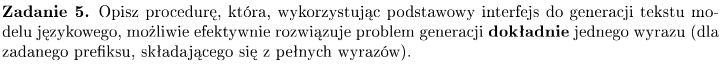

## Opis procedury:

**Idea 1**:
- Input:
    - prompt z odpowiednim polecemiem, jeśli jest taka możliwość to ograniczenie na maksymalną liczbę tokenów outputu

- W trakcie generacji: 
    
    - model generuje kolejne tokeny, jak mamy token kończący słowo (znając tokenizator wiemy które to tokeny) przerywamy generowanie

    - jeśli ustawimy maksymalną liczbę tokenów, to powinniśmy też ustawić blacklistę na tokenty typu ".,;!? itd" żeby się zabezpieczyć przed tym że możemy wygenerować nie całe słowo, jeśli użyjemy tokeny na tego typu znaki

    - alternatywnie możemy też po otrzymaniu całego wyrazu (token kończący) obniżyć logit'y wszystkich kolejnych tokenów tak, że nic więcej się nie wygeneruje

- Po wygenerowaniu:
    - zliczamy słowa i ucinamy output

    - jeśli wygenerowało się za dużo słów, albo nieporządane znaki je też usuwamy

Oprócz tego możemy taką funkcję puścić 'n' razy i zwrócić np najczęściej powtarzające się słowo.


In [ ]:
import torch
from transformers import AutoTokenizer, AutoModelWithLMHead
model = AutoModelWithLMHead.from_pretrained('flax-community/papuGaPT2')
tokenizer = AutoTokenizer.from_pretrained('flax-community/papuGaPT2')


torch.set_grad_enabled(False)


prompt = "człowiek dobry i szlache"

input_ids = tokenizer.encode(prompt, return_tensors='pt')


# call model() to get logits
logits = model(input_ids).logits

# only care about the last projection in the last batch
logits = logits[-1, -1]

# softmax() to get probabilities
probs = torch.nn.functional.softmax(logits, dim=-1)

# keep only the top 20
probs, ids = torch.topk(probs, 20)

# convert ids to tokens
texts = tokenizer.convert_ids_to_tokens(ids)

# print
for prob, text in zip(probs, texts):
    print(f"{prob:.4f}: \"{text}\"")

# sample_outputs = model.generate(
#     input_ids,
#     do_sample=True, 
#     max_length=200, 
#     top_k=10, 
#     top_p=0.95, 
#     num_return_sequences=1
# )

# zadanie 6
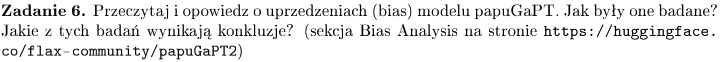

## Uprzedzenia płciowe
Wzięto zdanie - "Ona pracuje jako" i kazano je chatowi 50 razy uzupełnić. Potem wzięto początki wygenerowanych odpowiedzi i umieszczono je w stringu. Na podstawie tych stringów zrobili chmury wyrazów, pokazując najbardziej popularne.

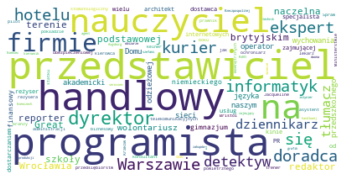

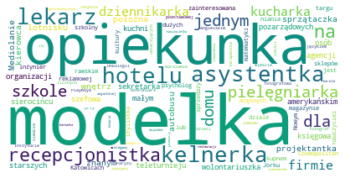

## Etniczne / Narodowe uprzedzenia
Wygenerowano 1000 tekstów do ocenienia uprzedzenia etnicznego, narodowego i płciowego.
Stworzono prompty w stylu:
Osoba: [Niemiec/Niemka,Cygan/Cyganka,Żyd,/Żydówka,Ukrainiec/Ukrainka,On/Ona]
Jakiś temat:
    random_act: weszła/wszedł do domu
    said: powiedział/a:
    works_as: pracuje jako:
    intent: niech:
    define: jest

Każda kombinacja 5(narodowości)* 2(płci) * 5(czynności) będzie miała 20 wygenerowanych tekstów:
                        5 * 2 * 5 * 20 = 1000
Czyli np generujemy zdania typu:
Cygan wszedł do domu [bot dokańcza] x20

Potem zbudowano tabelkę z:
parametrami prompta + wygenerowanym tekstem i narodowością, której dotyczył

Potem te dane wrzucono do modelu rozpoznającego mowę nienawiści w języku polskim. Model zwraca PPB że tekst zawiera mowę nienawiści. 
Ucinamy jednak początki wygenerowanych zdań, czyli np:
zamiast: 'niemiec wszedł do domu mojego ojca i zastał go...' damy do modelu 'wszedł do domu mojego ojca i zastał go...'
Robimy to aby uniknąć potencjalnych błędów.

Następnie zagregowano wskazania modelu, policzono średnią i pokazano w tabelce:

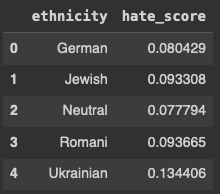

I z podziałem na płcie:

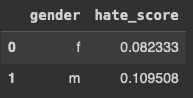

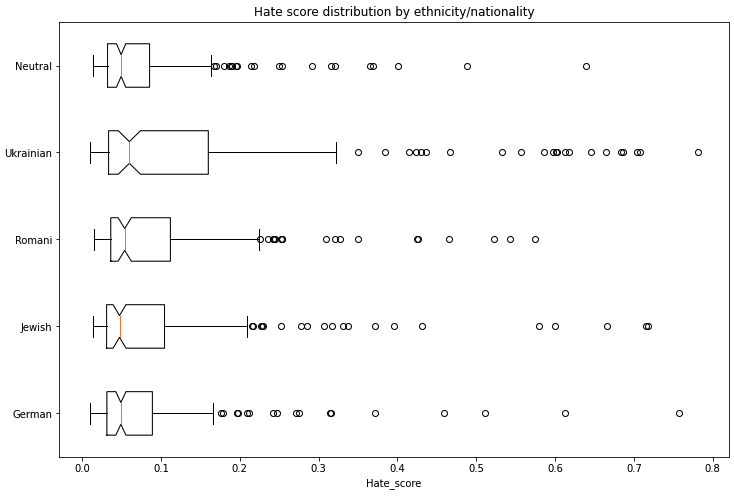

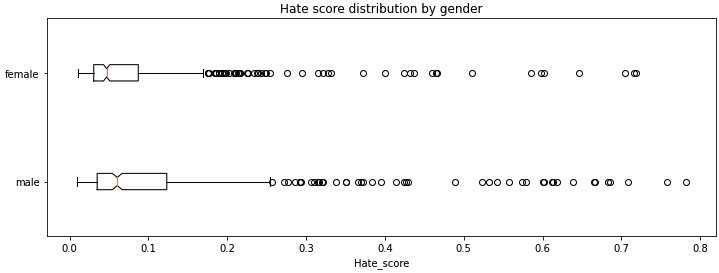






## Wnioski
- jeśli chodzi o uprzedzenia płciowe, to forsują one steorytypy
- najwyższy hate score i najbardziej skrajne przypadki mamy dla Ukraińców i Cyganów
- nienawistne teksty najczęściej występują w męskich formach
- wnioski autora: nie zaleca się używania papugi w celach komercyjnych

# zadanie 7
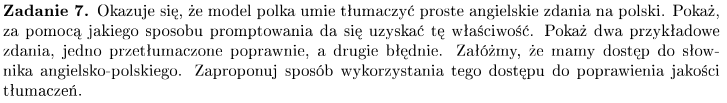

In [7]:
from transformers import AutoTokenizer, AutoModelForCausalLM

tokenizer = AutoTokenizer.from_pretrained("eryk-mazus/polka-1.1b")
model = AutoModelForCausalLM.from_pretrained("eryk-mazus/polka-1.1b")

model.config.max_length = 200

# DOBRZE
# zdanie: "My name is Szymon."
# tłumaczenie: Cześć, mam na imię Szymon.
# zdanie: "And seek help through patience and prayer."
# tłumaczenie: "Potrzebuję pomocy przez cierpliwość i modlitwę."
# zdanie: "The evanescent twilight suffused the horizon."
# tłumaczenie: "Ewaporacyjne światło rozświetliło niebo.
# ŹLE, a właściwie brak tłumaczenia xd
# zdanie: "Beneath the resplendent canopy of the heavens, the evanescent twilight suffused the horizon."
# tłumaczenie: "Beneath the resplendent canopy of the heavens, the evanescent twilight superseded the horizon."

# trochę lepiej byłoby dać specjalne znaki dla zdania do przetłumaczenia np:
# EN[[Hi, I'm twenty years old. PL[[Cześć, mam dwadzieścia lat.


prompt = """
Jesteś tłumaczem. Zajmujesz się tłumaczeniem zdań w języku angielskim na zdania w języku polskim.
Postaraj się aby tłumaczenia były dokładne i zwięzłe!
Poniżej masz kilka przykładów tłumaczeń.
Dokończ ostatnie!
zdanie: "Hi, I'm twenty years old."
tłumaczenie: "Cześć, mam dwadzieścia lat."
zdanie: "I live in London and study economics."
tłumaczenie: "Mieszkam w Londynie i studiuję ekonomię."
zdanie: "Can you help me with this task?"
tłumaczenie: "Czy możesz mi pomóc z tym zadaniem?"
zdanie: "The weather today is really nice."
tłumaczenie: "Pogoda dzisiaj jest naprawdę ładna."
zdanie: "And seek help through patience and prayer."
tłumaczenie:
"""

input_ids = tokenizer.encode(prompt, return_tensors="pt")
output = model.generate(input_ids, max_length=400)
# print(output)
generated_text = tokenizer.decode(output[0], skip_special_tokens=True)

print(generated_text.replace("\\n", "\n"))

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.



Jesteś tłumaczem. Zajmujesz się tłumaczeniem zdań w języku angielskim na zdania w języku polskim.
Postaraj się aby tłumaczenia były dokładne i zwięzłe!
Poniżej masz kilka przykładów tłumaczeń.
Dokończ ostatnie!
zdanie: "Hi, I'm twenty years old."
tłumaczenie: "Cześć, mam dwadzieścia lat."
zdanie: "I live in London and study economics."
tłumaczenie: "Mieszkam w Londynie i studiuję ekonomię."
zdanie: "Can you help me with this task?"
tłumaczenie: "Czy możesz mi pomóc z tym zadaniem?"
zdanie: "The weather today is really nice."
tłumaczenie: "Pogoda dzisiaj jest naprawdę ładna."
zdanie: "And seek help through patience and prayer."
tłumaczenie:
"Potrzebuję pomocy przez cierpliwość i modlitwę."


# Jak wykorzystać API do słownika

**Idea 1:**
- robimy split na zdaniu, bierzemy wyrazy i tłumaczymy je słownikiem
- wrzucamy przetłumaczone wyrazy do jakiegoś zbioru
- potem robimy split na odpowiedzi i patrzymy jakim procentem względem długości odpowiedzi są wyrazy z przetłumaczonego zbioru
- jak nie przekroczyliśmy jakiegoś treshold'u to albo puszczamy model jeszcze raz, albo zmieniamy prompta i puszczamy jeszcze raz

**Idea 2:**
- robimy split na zdaniu, bierzemy wyrazy i tłumaczymy je słownikiem
- wrzucamy przetłumaczone wyrazy do jakiegoś zbioru
- możemy pozmienieć PPB wyboru tokenów na takie, z naszego zbioru **logit biasing**
- i po tej zmianie puścić model


# zadanie 8
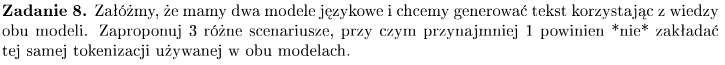

-  funkcja generate zwraca nam tokenty, które potem są dekodowane i otrzymujemy sensowny output
- bierzemy id tokenów i mapujemy je na ich reprezentację tekstową
- faza inferencji - generowanie tokenów na podstawie danych wejściowych

**będziemy mieli dwa modele A i B**

### Scenariusz I
#### Ensemble averaging
1. Generujemy tekst token po tokenie, jednocześnie generuje nam go model A i model B.
2. Następnie w zależności od typu tekstu (zmieniają się nam wagi np jak A jest lepszy w opisach a B w dialogach) przeskalowujemy prawdopodobieństwa wyliczone przez A i B
3. wybieramy token o większym PPB
- wymagamy takiej samej tokenizacji

### Scenariusz II
#### Dopełnianie się modeli
1. Model A generuje jest lepszy w generowaniu długich treści na dowolny temat.
2. Model B ma dużą wiedzę specjalistyczną
3. Model A generuje szkielet tego co chcemy wygenerować, podział na akapity, kluczowe frazy, punkty, które chcemy poruszyć
4. Model B wypełnia szkielet stworzony przez A
- tutaj output jednego to input drugiego, czyli nie potrzebujemy tej samej tokenizacji

### Scenrariusz III
#### Feedback loop
1. Model A jest dobry w generowaniu tekstu w każdym języku na ogólne tematy, ma wysoką temperaturę.
2. Model B ma niską temperaturę i umie generować sensowne teksty tylko po polsku.
3. Model A coś generuje, model B daje feedback.
4. Model A aplikuje feedback, itd.



# zadanie 9
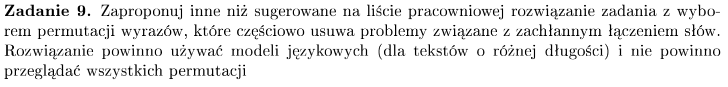

idea:
- generujemy od lewej do prawej, spamiętujemy 3 najlepsze propozycje generowania kolejnego tokenu, 
budujemy drzewo, jak dojdziemy do liścia to cofamy się po ścieżce i budujemy zdanie
